In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
print(list(train_df.columns.difference(test_df.columns)))

['SalePrice']


In [4]:
all_df = pd.concat([train_df.assign(ind="train"), test_df.assign(ind="test")])
all_df.shape

(2919, 82)

In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
train = all_df[all_df["ind"].eq("train")]
test = all_df[all_df["ind"].eq("test")]

train_ID = train['Id']
test_ID = test['Id']

all_df.drop(['Id'], axis=1, inplace=True)

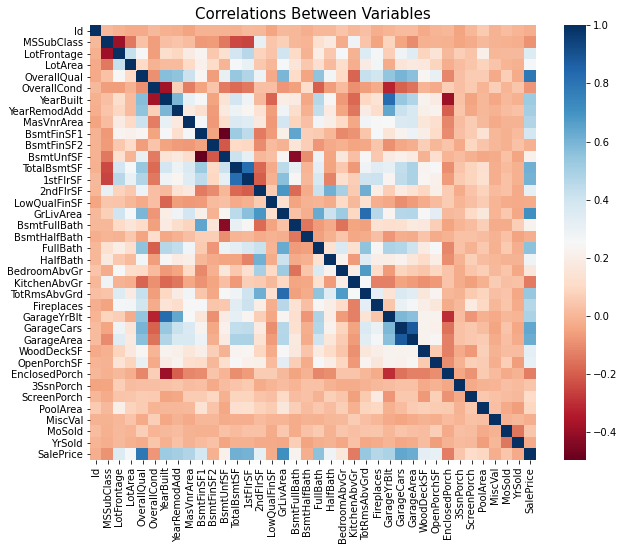

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

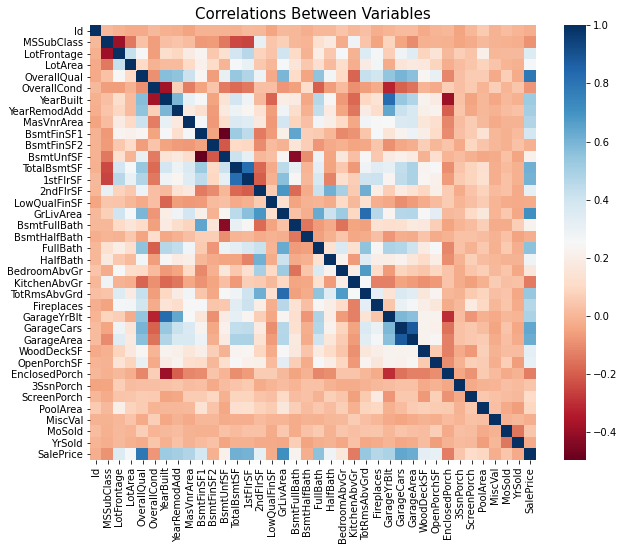

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

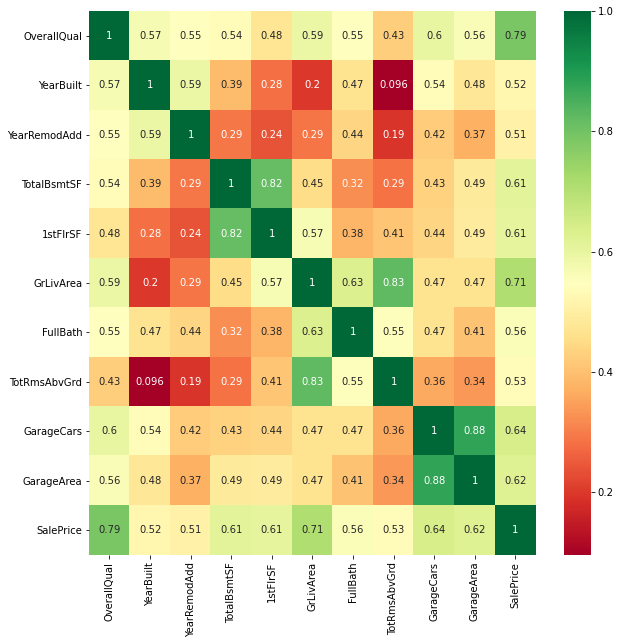

In [9]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


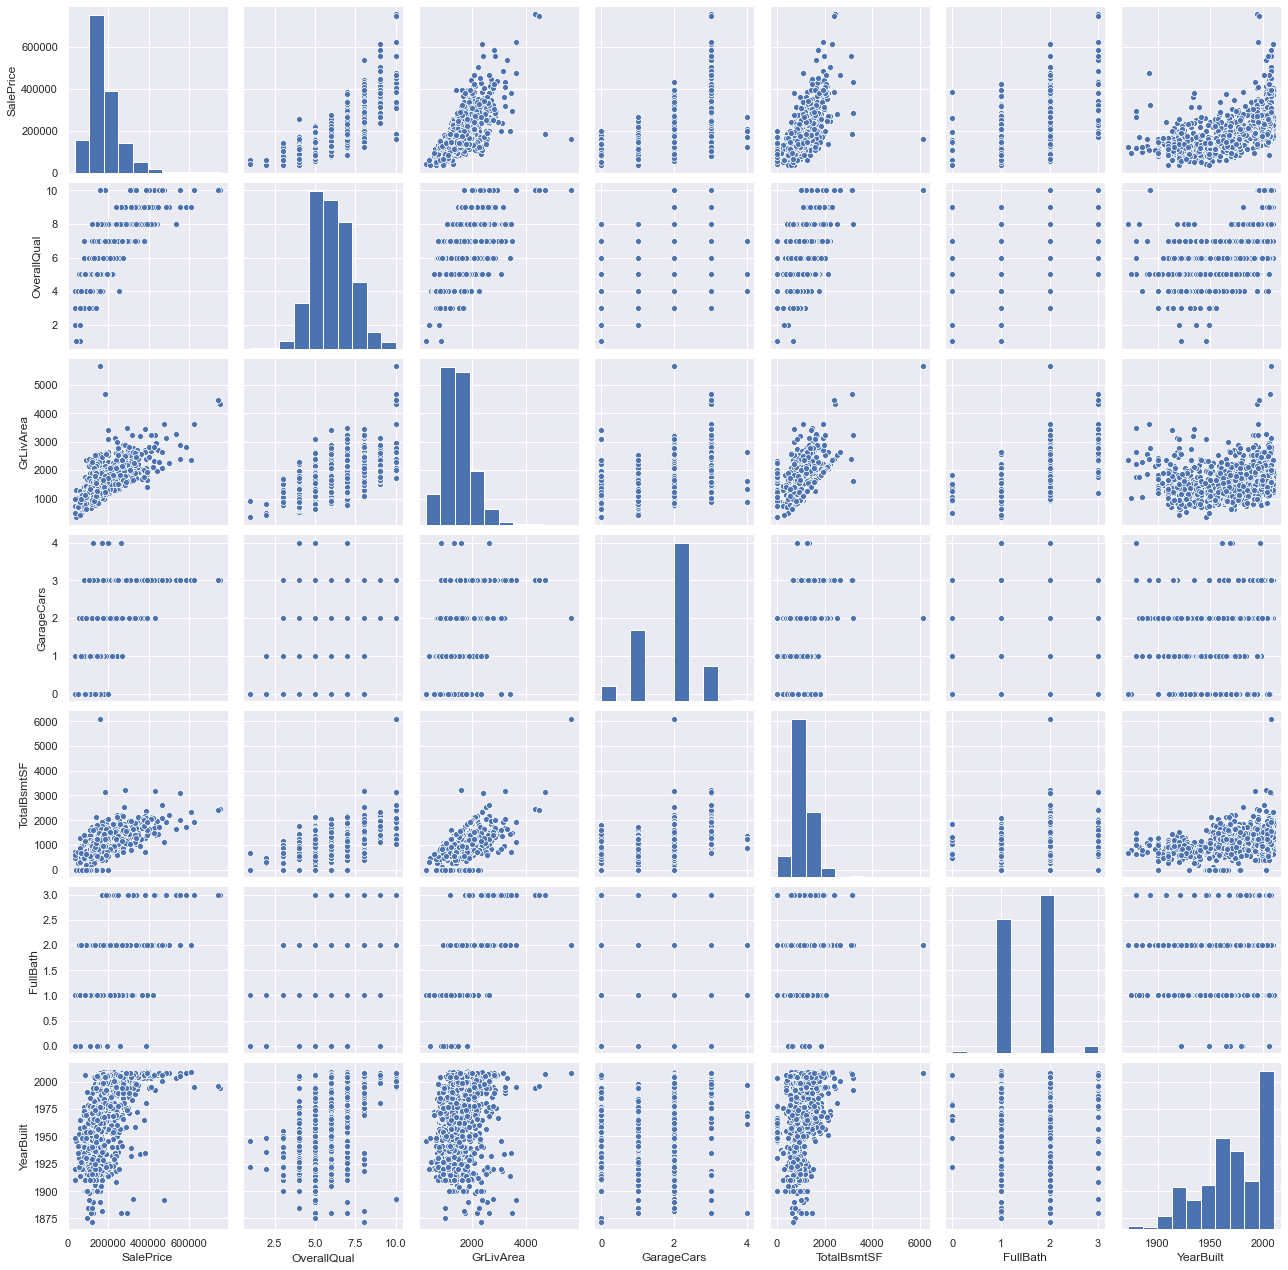

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [11]:
target = train['SalePrice']
all_df.drop(['SalePrice'], axis=1, inplace = True)

In [12]:
null_data = all_df.isna().sum()

missing_value_percent = null_data / all_df.shape[0] * 100
missing_value_columns = missing_value_percent[ missing_value_percent > 40].keys()

In [13]:
all_df = all_df.drop(columns = missing_value_columns)
print(all_df.shape)

(2919, 75)


In [14]:
null_data = all_df.isna().sum()
null_data[null_data>0]

MSZoning          4
LotFrontage     486
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

In [15]:
all_ind = all_df['ind']
all_df = all_df.drop(['ind'], axis=1)

In [16]:
cols = all_df.columns

num_cols = all_df._get_numeric_data().columns

cat_cols = list(set(cols) - set(num_cols))

In [17]:
tmp_list = []
for item in cat_cols:
    count = 0
    tmp_dic = {}

    tmp_list = all_df[item].unique().tolist()
    for tmp_item in tmp_list:
        if tmp_item is not np.nan:
            tmp_dic[tmp_item] = count
            count += 1
        else:
            tmp_dic[tmp_item] = np.nan
    tmp_str = str(item) + 'map'
    

    all_df[tmp_str] = all_df[item].map(tmp_dic)
    all_df = all_df.drop(item, axis = 1)

In [18]:
null_data = all_df.isna().sum()
null_data[null_data > 0]

LotFrontage        486
MasVnrArea          23
BsmtFinSF1           1
BsmtFinSF2           1
BsmtUnfSF            1
TotalBsmtSF          1
BsmtFullBath         2
BsmtHalfBath         2
GarageYrBlt        159
GarageCars           1
GarageArea           1
Electricalmap        1
Exterior2ndmap       1
MasVnrTypemap       24
Utilitiesmap         2
BsmtExposuremap     82
Exterior1stmap       1
GarageCondmap      159
BsmtFinType2map     80
BsmtQualmap         81
KitchenQualmap       1
GarageFinishmap    159
Functionalmap        2
GarageQualmap      159
SaleTypemap          1
BsmtFinType1map     79
BsmtCondmap         82
GarageTypemap      157
MSZoningmap          4
dtype: int64

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
idf = pd.DataFrame(imputer.fit_transform(all_df))
idf.columns=all_df.columns
idf.index=all_df.index
idf

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleTypemap,Streetmap,Condition1map,BsmtFinType1map,RoofMatlmap,CentralAirmap,LandSlopemap,BsmtCondmap,GarageTypemap,MSZoningmap
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.817405,1.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.000000,1.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180389,0.0


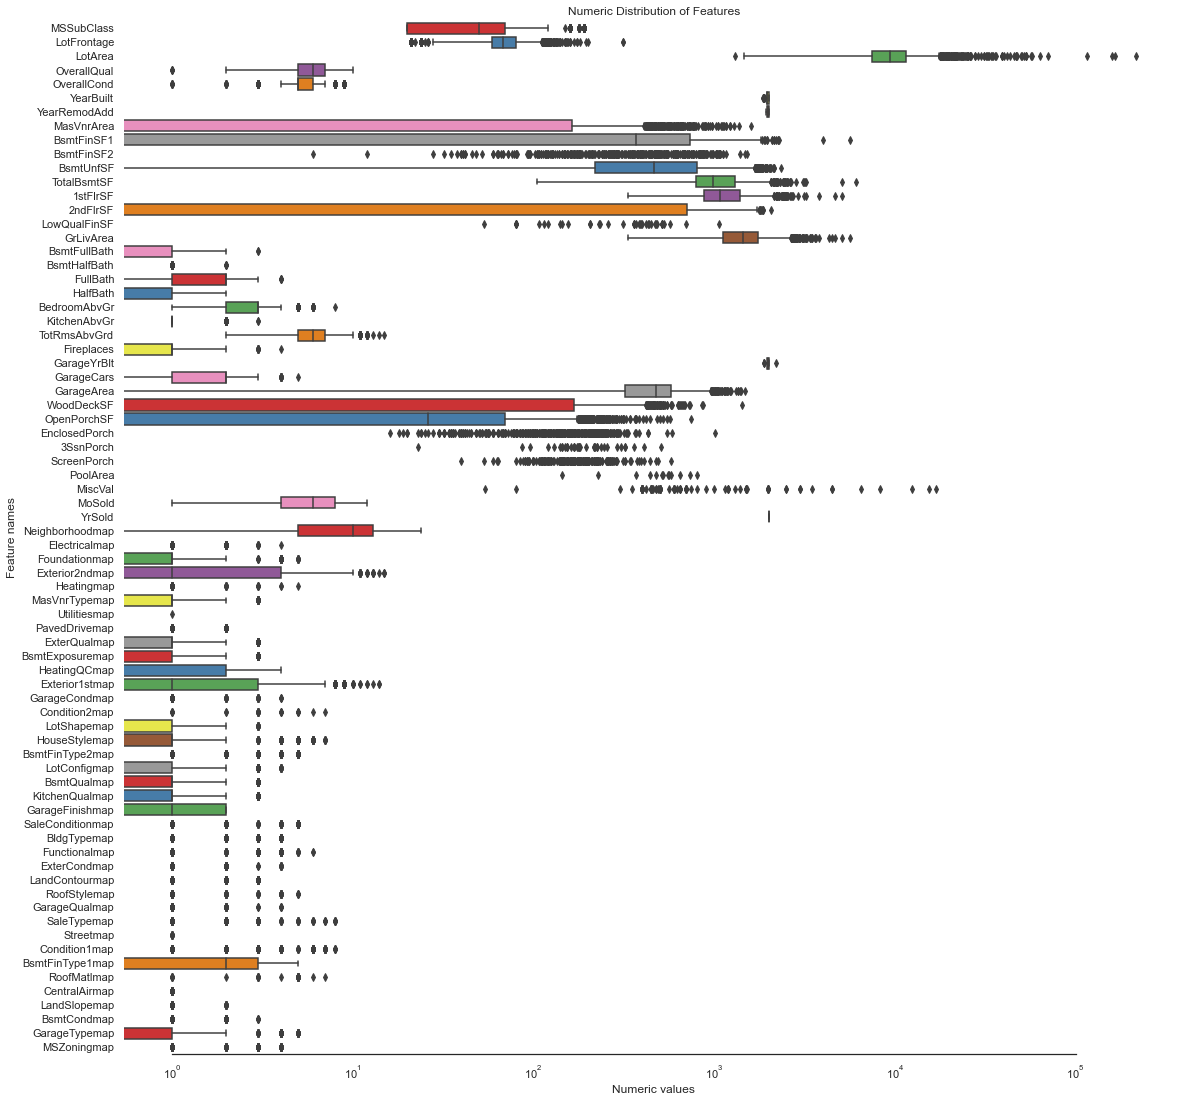

In [20]:
df_exclude_obj=all_df.select_dtypes(exclude=['object'])

sns.set_style("white")
f, ax = plt.subplots(figsize=(19, 19))
ax.set_xscale("log")
ax = sns.boxplot(data=df_exclude_obj , orient="h", palette="Set1")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [21]:
scaler = StandardScaler()

sidf = pd.DataFrame(scaler.fit_transform(idf))
sidf.columns=idf.columns
sidf.index=idf.index
sidf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleTypemap,Streetmap,Condition1map,BsmtFinType1map,RoofMatlmap,CentralAirmap,LandSlopemap,BsmtCondmap,GarageTypemap,MSZoningmap
0,0.067331,-0.221679,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.523138,0.581107,-0.293079,...,-0.295675,-0.064249,-0.320122,-1.160352,-0.112918,-0.26829,-0.21626,-0.289831,-0.637199,-0.442228
1,-0.873616,0.441273,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572582,1.178256,-0.293079,...,-0.295675,-0.064249,0.483348,-0.482905,-0.112918,-0.26829,-0.21626,-0.289831,-0.637199,-0.442228
2,0.067331,-0.089089,0.137197,0.646183,-0.507284,0.980221,0.848965,0.333064,0.098120,-0.293079,...,-0.295675,-0.064249,-0.320122,-1.160352,-0.112918,-0.26829,-0.21626,-0.289831,-0.637199,-0.442228
3,0.302568,-0.442663,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572582,-0.494638,-0.293079,...,-0.295675,-0.064249,-0.320122,-0.482905,-0.112918,-0.26829,-0.21626,2.019407,0.548976,-0.442228
4,0.067331,0.618060,0.518903,1.355551,-0.507284,0.947203,0.753229,1.384061,0.469142,-0.293079,...,-0.295675,-0.064249,-0.320122,-1.160352,-0.112918,-0.26829,-0.21626,-0.289831,-0.637199,-0.442228


In [22]:
sidf['ind'] = all_ind

In [23]:
x_test, x_train = sidf[sidf['ind'].eq('test')], sidf[sidf['ind'].eq('train')]
x_train.drop(['ind'], axis=1, inplace=True)
x_test.drop(['ind'], axis=1, inplace=True)
y_train = list(target)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()

model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [25]:
r2_score = r2_score(y_train,y_train_pred)
r2_score

0.8455957037373297